# Step0. 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# Step1. 데이터 구성하기

In [5]:
ds = pd.read_csv("IRIS.csv", engine = "python")
ds['SPECIES'].replace(to_replace='setosa', value = 0, inplace = True)
ds['SPECIES'].replace(to_replace='versicolor', value = 1, inplace = True)
ds['SPECIES'].replace(to_replace='virginica', value = 2, inplace = True)
ds.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Step2. 데이터 전처리(표준화)

In [7]:
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)
ds_scaled[:5]

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 , -1.22474487],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 , -1.22474487],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 , -1.22474487],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 , -1.22474487]])

In [10]:
ds_y = ds_scaled[:, -1]
ds_x = ds_scaled[:, 0::]

# Step3. 계층적 군집분석 실시

Text(0, 0.5, 'sample index')

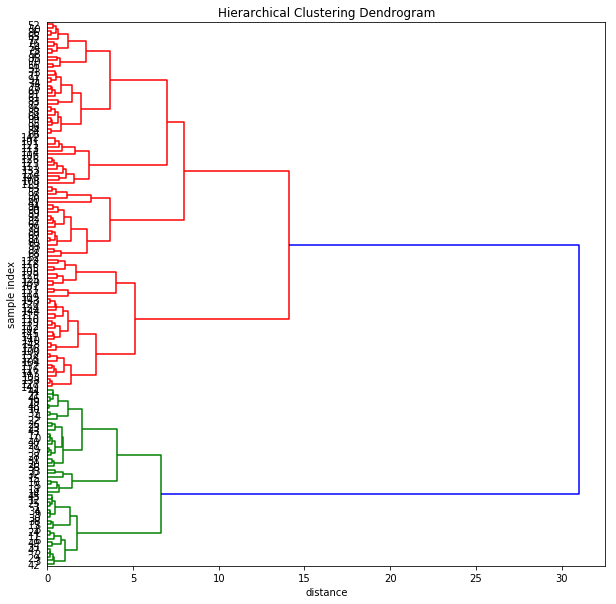

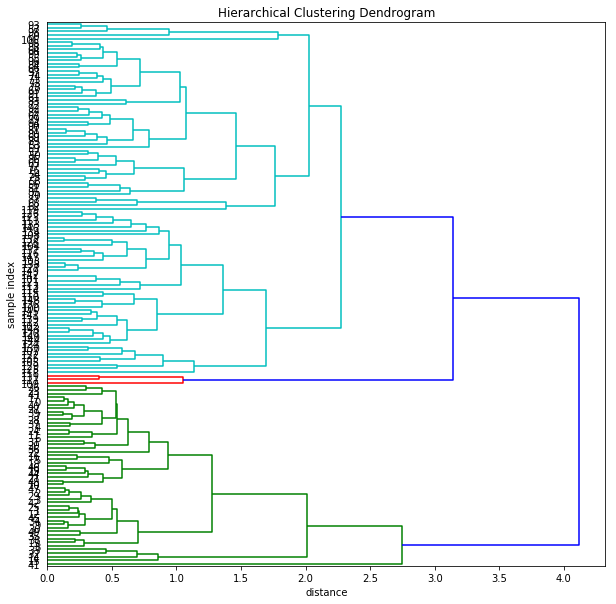

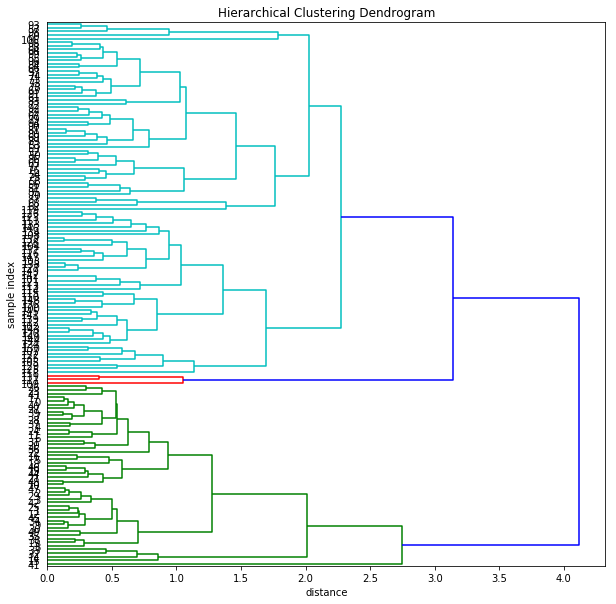

In [11]:
# 연결 : ward, 거리계산 : Euclidean
Z_ward = linkage(ds_x, method = "ward", metric = "euclidean")
Z_average = linkage(ds_x, method = "average", metric = "euclidean")
Z_Minkowski = linkage(ds_x, method = "average", metric = "minkowski")

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_average, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_Minkowski, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [14]:
cluster_hierarchical = fcluster(Z= Z_ward, t = 10, criterion = "distance")
ds["ClusterHierarchical"] = cluster_hierarchical
ds.groupby('ClusterHierarchical').mean()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
ClusterHierarchical,,,,,
1,5.016327,3.451020,1.465306,0.244898,0.0
2,6.819444,3.108333,5.733333,2.105556,2.0
3,5.926154,2.732308,4.392308,1.416923,1.2


## 군집별 데이터 요약

In [15]:
ds_summary_hc = ds.groupby("ClusterHierarchical").agg(["min", "mean", "max"])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 +"_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,4.3,5.016,5.8,2.9,3.451,4.4,1.0,1.465,1.9,0.1,0.245,0.6,0,0.0,0
1,2,5.9,6.819,7.9,2.6,3.108,3.8,4.8,5.733,6.9,1.6,2.106,2.5,2,2.0,2
2,3,4.5,5.926,7.0,2.0,2.732,3.4,1.3,4.392,5.8,0.3,1.417,2.4,0,1.2,2


# Step4. K-평균 군집분석 실시

In [17]:
n_iter_cluster = 30
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for n_clus in cluster_range:
    clus = KMeans(n_clus)
    clus.fit(ds_x)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster" : cluster_range, "Error" : clus_error})
ds_error

,NumberofCluster,Error
0,1,750.000000
1,2,259.861705
2,3,162.171079
3,4,134.646870
4,5,109.917113
5,6,85.134965
6,7,75.848289
7,8,66.032387
8,9,59.104306
9,10,53.830288


Text(0, 0.5, 'Sum of squared distance')

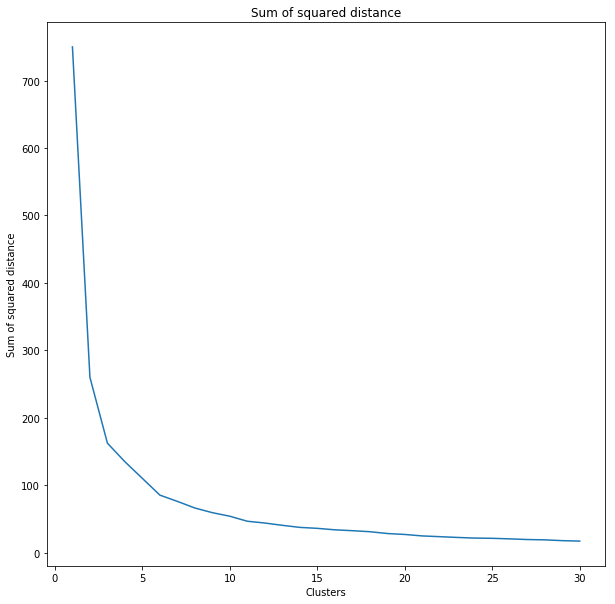

In [18]:
plt.figure(figsize = (10, 10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [24]:
clus = KMeans(3)
clus.fit(ds_x)
cluster_kmeans = [i+1 for i in clus.labels_]
ds["ClusterKmeans"] = cluster_kmeans
ds.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical,ClusterKmeans
0,5.1,3.5,1.4,0.2,0,1,2
1,4.9,3.0,1.4,0.2,0,1,2
2,4.7,3.2,1.3,0.2,0,1,2
3,4.6,3.1,1.5,0.2,0,1,2
4,5.0,3.6,1.4,0.2,0,1,2


In [25]:
ds_summary_km = ds.drop(["ClusterHierarchical"], axis = 1, inplace = False)\
                    .groupby("ClusterKmeans").agg(["min", "mean", "max"])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,5.8,6.741,7.9,2.5,3.043,3.8,4.7,5.587,6.9,1.4,2.033,2.5,1,1.935,2
1,2,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6,0,0.000,0
2,3,4.9,5.854,6.8,2.0,2.726,3.4,3.0,4.326,5.6,1.0,1.372,2.0,1,1.130,2


# Step5. DBSCAN 군집 분석

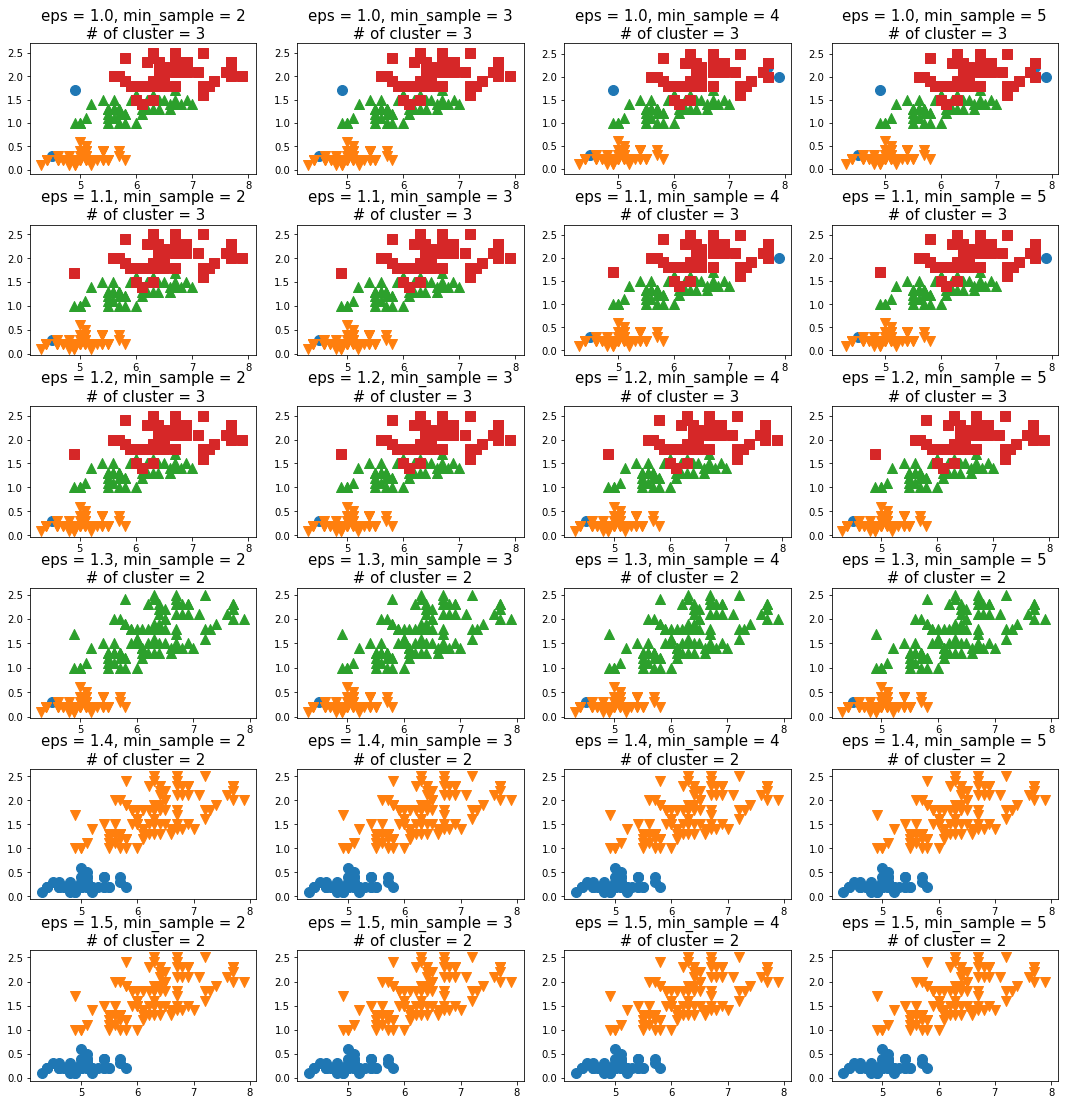

In [29]:
X = ds["SEPAL_LENGTH"]
Y = ds["PETAL_WIDTH"]
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]

para_eps = [k/10 for k in range(10 ,16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15,15))
fig.tight_layout(w_pad = 1, h_pad = 3)
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps)
        clusters = dbscan.fit_predict(ds_x)
        clusters = clusters + 1
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters) + 1, 1)):
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) + \
                                "\n # of cluster = " + str(max(clusters)), fontsize = 15)

In [30]:
dbscan = DBSCAN(eps = 1.4, min_samples = 2).fit(ds_x)
cluster_dbscan = dbscan.labels_
for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else :
        cluster_dbscan[i] = cluster_dbscan[i] + 1
ds["ClusterDBScan"] = cluster_dbscan
ds.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,5.1,3.5,1.4,0.2,0,1,2,1
1,4.9,3.0,1.4,0.2,0,1,2,1
2,4.7,3.2,1.3,0.2,0,1,2,1
3,4.6,3.1,1.5,0.2,0,1,2,1
4,5.0,3.6,1.4,0.2,0,1,2,1


In [31]:
ds_summary_db = ds.drop(["ClusterHierarchical", "ClusterKmeans"], axis = 1, inplace = False)\
                    .groupby("ClusterDBScan").agg(["min", "mean", "max"])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBScan,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6,0,0.0,0
1,2,4.9,6.262,7.9,2.0,2.872,3.8,3.0,4.906,6.9,1.0,1.676,2.5,1,1.5,2
